```Firstly, we have to generate approximated "XOR" dataset```

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

THRESHOLD = 0.1

def generate_xor_dataset(N_C1: int, N_C2: int) -> [pd.DataFrame]:
        columns = ["x", "y", "label"]
        dataframe = pd.DataFrame(columns=columns)

        # generate points from class 1: around diagonal (0,0) to (1,1)
        for i in range(0, N_C2):
            random_center = np.random.uniform(0.0, 1.0)
            coords = [{'x': random_center + np.random.uniform(-THRESHOLD, THRESHOLD),
                       'y': random_center + np.random.uniform(-THRESHOLD, THRESHOLD),
                       'label': 0}]
            dataframe = dataframe.append(pd.DataFrame(coords))

        # generate points from class 2: around (1,0) and (0,1)
        for i in range(0, int(np.round(N_C1 / 2))):
            coords = [{'x': 1.0 + np.random.uniform(-THRESHOLD, THRESHOLD),
                       'y': 0.0 + np.random.uniform(-THRESHOLD, THRESHOLD),
                       'label': 1}]
            dataframe = dataframe.append(pd.DataFrame(coords))

        # for i in range(0, int(np.round(N_C1 / 2))):
        #     coords = [{'x': 0.0 + np.random.uniform(-THRESHOLD, THRESHOLD),
        #                'y': 1.0 + np.random.uniform(-THRESHOLD, THRESHOLD),
        #                'label': 1}]
        #     dataframe = dataframe.append(pd.DataFrame(coords))

        return dataframe

In [2]:
# generate the XOR dataset
dataset = generate_xor_dataset(100, 200)

Plot the approximated XOR dataset

<AxesSubplot:xlabel='x', ylabel='y'>

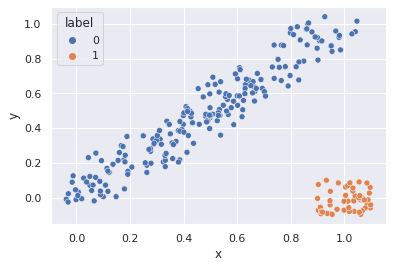

In [3]:
fig = plt.figure()
sns.scatterplot(x='x', y='y', data=dataset, hue='label')

Create CentroidNetwork with 2 centroid layers.

In [4]:
from centroid_network.CentroidNetwork import CentroidNetwork
from centroid_network.CentroidLayer import CentroidLayer

CN = CentroidNetwork()
layer0 = CentroidLayer(1)
CN.append_layer(layer0)

labels = dataset['label']
dataset = dataset.drop(labels=['label'], axis=1)

In [5]:
CN.train(dataset, labels)

100%|██████████| 2/2 [00:00<00:00, 495.66it/s]


[Layer 0] Training the network (calculating centroids)...
[Layer 0] Feeding data forward...


In [6]:
from collections import defaultdict

centroids = CN.layers[0].centroids
temp = defaultdict(list)
for label, centroids in centroids.items():
    for centroid in centroids:
        temp[str(label)].append(centroid.coordinates[0])
        temp[str(label)].append(centroid.coordinates[1])

centroids = temp
print(centroids)

# del centroids['default_factory']
df = pd.DataFrame(list(centroids.values()), columns = ['x','y'])
df['label'] = centroids.keys()
print(df)

defaultdict(<class 'list'>, {'0': [0.47133348384321416, 0.47243926551051785], '1': [1.0136144265225144, -0.016425496829221647]})
          x         y label
0  0.471333  0.472439     0
1  1.013614 -0.016425     1


<AxesSubplot:xlabel='x', ylabel='y'>

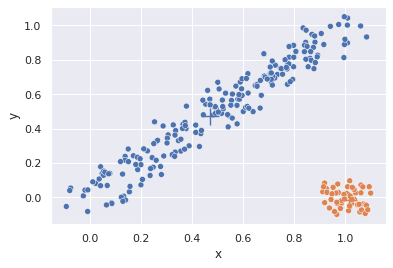

In [7]:
dataset = generate_xor_dataset(100, 200)

sns.scatterplot(x='x', y='y', data=dataset, hue='label', legend=None)
sns.scatterplot(x='x', y='y', data=df, hue='label', s=300, marker='+', legend=None)

In [8]:
from itertools import repeat

output = CN.output
temp = defaultdict(list)
for label, centroids in output.items():
    for centroid in centroids:
        temp[str(label)].append(centroid.coordinates[0])
output = temp

idx = output.keys()
items = output.values()

df1 = pd.concat(pd.Series(output[i]) for i in idx).T

df1 = pd.DataFrame(df1)
df1 = df1.reset_index()
del df1['index']

df1['y'] = pd.Series([0] * 250)
df1.columns=['x', 'y']

labels = labels.reset_index()
del labels['index']

df1['label'] = labels

print(df1)

# print(df1[:199])
%matplotlib qt
sns.scatterplot(x='x', y='y', data=df1, hue='label')
plt.show()

# plt.savefig("./saved_fig.png")

            x  y label
0    0.507678  0     0
1    0.562384  0     0
2    0.640477  0     0
3    0.650325  0     0
4    0.532800  0     0
..        ... ..   ...
245  0.503737  0     1
246  0.516297  0     1
247  0.526600  0     1
248  0.518437  0     1
249  0.525303  0     1

[250 rows x 3 columns]
